<a href="https://colab.research.google.com/github/StealthSpecter/BioSync/blob/main/BioSensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install paho-mqtt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 1.9 MB/s eta 0:00:00


<ipython-input-2-d3c7e10064cf>:12: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  self.client = mqtt.Client()


Published: {'sensor_id': 'UNIT_001', 'timestamp': '2025-01-04T20:28:39.307638', 'temperature': 51.05, 'pressure': 1.26, 'gas_composition': {'methane': 57.58, 'co2': 25.42, 'other': 11.44}}
Published: {'sensor_id': 'UNIT_001', 'timestamp': '2025-01-04T20:28:44.312370', 'temperature': 37.11, 'pressure': 1.36, 'gas_composition': {'methane': 56.16, 'co2': 25.83, 'other': 12.63}}
Published: {'sensor_id': 'UNIT_001', 'timestamp': '2025-01-04T20:28:49.318024', 'temperature': 58.65, 'pressure': 1.37, 'gas_composition': {'methane': 61.64, 'co2': 28.74, 'other': 7.77}}
Published: {'sensor_id': 'UNIT_001', 'timestamp': '2025-01-04T20:28:54.323429', 'temperature': 62.38, 'pressure': 1.44, 'gas_composition': {'methane': 59.83, 'co2': 30.86, 'other': 5.77}}
Published: {'sensor_id': 'UNIT_001', 'timestamp': '2025-01-04T20:28:59.328432', 'temperature': 64.47, 'pressure': 1.06, 'gas_composition': {'methane': 64.1, 'co2': 34.75, 'other': 6.26}}
Published: {'sensor_id': 'UNIT_001', 'timestamp': '2025-01-

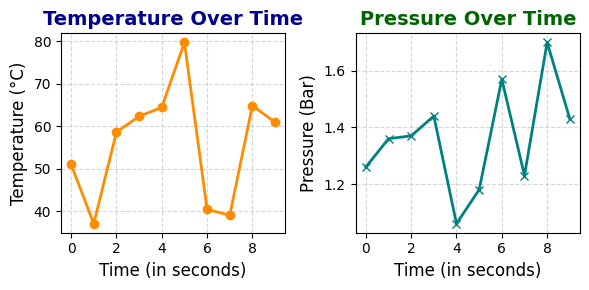


--- Biomass Sensor Data Analysis ---
Average Temperature: 55.89 °C
Average Pressure: 1.36 Bar

Conclusion:
The temperature is low, which might indicate unsuitable biomass for energy production.
The pressure is low, indicating suboptimal conditions for biomass energy production.


In [2]:
import random
import json
import paho.mqtt.client as mqtt
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np

class BiomassSensorWithGraphs:
    def __init__(self, sensor_id):
        self.sensor_id = sensor_id
        self.client = mqtt.Client()
        self.client.connect("test.mosquitto.org", 1883, 60)  # Using public MQTT broker
        self.temperature_readings = []
        self.pressure_readings = []

    def read_temperature(self):
        return round(random.uniform(30, 80), 2)  # Simulate temperature

    def read_pressure(self):
        return round(random.uniform(1, 2), 2)  # Simulate pressure

    def read_gas_composition(self):
        return {
            'methane': round(random.uniform(50, 65), 2),
            'co2': round(random.uniform(25, 35), 2),
            'other': round(random.uniform(5, 15), 2)
        }

    def publish_data(self):
        data = {
            'sensor_id': self.sensor_id,
            'timestamp': datetime.now().isoformat(),
            'temperature': self.read_temperature(),
            'pressure': self.read_pressure(),
            'gas_composition': self.read_gas_composition()
        }

        # Publish the data to MQTT
        self.client.publish(f"biosync/sensor/{self.sensor_id}", json.dumps(data))
        return data

    def plot_graphs(self):
        # Create a figure with 2 subplots in one row
        fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # (1 row, 2 columns)

        # Plot Temperature graph
        axs[0].plot(self.temperature_readings, color='darkorange', marker='o', linestyle='-', linewidth=2, markersize=6)
        axs[0].set_title("Temperature Over Time", fontsize=14, fontweight='bold', color='darkblue')
        axs[0].set_xlabel("Time (in seconds)", fontsize=12)
        axs[0].set_ylabel("Temperature (°C)", fontsize=12)
        axs[0].grid(True, linestyle='--', alpha=0.5)

        # Plot Pressure graph
        axs[1].plot(self.pressure_readings, color='teal', marker='x', linestyle='-', linewidth=2, markersize=6)
        axs[1].set_title("Pressure Over Time", fontsize=14, fontweight='bold', color='darkgreen')
        axs[1].set_xlabel("Time (in seconds)", fontsize=12)
        axs[1].set_ylabel("Pressure (Bar)", fontsize=12)
        axs[1].grid(True, linestyle='--', alpha=0.5)

        # Adjust layout for better spacing
        plt.tight_layout()
        plt.show()


# Example usage with graph plotting
if __name__ == "__main__":
    sensor = BiomassSensorWithGraphs("UNIT_001")

    # Collecting data for a fixed number of readings
    num_readings = 10
    for i in range(num_readings):
        data = sensor.publish_data()
        sensor.temperature_readings.append(data['temperature'])
        sensor.pressure_readings.append(data['pressure'])
        print(f"Published: {data}")
        time.sleep(5)  # Sleep for 5 seconds between data collection

    # Plot the graphs side by side
    sensor.plot_graphs()

    # Conclusion based on the collected data
    avg_temp = np.mean(sensor.temperature_readings)
    avg_pressure = np.mean(sensor.pressure_readings)

    print("\n--- Biomass Sensor Data Analysis ---")
    print(f"Average Temperature: {avg_temp:.2f} °C")
    print(f"Average Pressure: {avg_pressure:.2f} Bar")
    print("\nConclusion:")
    if avg_temp > 60:
        print("The temperature is high, which might indicate a suitable biomass for energy production.")
    else:
        print("The temperature is low, which might indicate unsuitable biomass for energy production.")

    if avg_pressure > 1.5:
        print("The pressure is high, suggesting possible optimal conditions for gas production.")
    else:
        print("The pressure is low, indicating suboptimal conditions for biomass energy production.")
